In [143]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from PIL import Image

In [144]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Print the number of available GPUs
    print(f"CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
    # Print the current GPU device
    print(f"Current GPU device: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch is running on CPU.")


CUDA is available. Number of GPUs: 1
Current GPU device: NVIDIA GeForce GTX 1650


###                                                      Image Transformations

In [145]:
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        # transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [146]:
ROOT_DIR = os.path.dirname(os.path.abspath(__name__))
print(ROOT_DIR)

batch_size = 8

c:\Users\Rahul Deepak\OneDrive\Desktop\dataverse_relevant_files\dataverse_relevant_files


### Splitting the dataset of 10000 images 

In [147]:
image_path = os.path.join(ROOT_DIR, "Images_set")
image_dataset = datasets.ImageFolder(image_path, transform = image_transforms["train"])

image_list = list(image_dataset)
np.random.shuffle(image_list)

index_to_labels = {}
for label in image_dataset.class_to_idx.keys():
    idx = image_dataset.class_to_idx[label]
    index_to_labels[idx] = label
print(index_to_labels)

NUM_CLASSES = len(index_to_labels.keys())
print("Number of classes:", NUM_CLASSES)

data_len = len(image_list)
n_test = int(0.1 * data_len)
test_set = torch.utils.data.Subset(image_list, range(n_test))
val_set = torch.utils.data.Subset(image_list, range(n_test, 2*n_test))
train_set = torch.utils.data.Subset(image_list, range(2*n_test, data_len))

train_data_size = len(train_set)
valid_data_size = len(val_set)
test_data_size = len(test_set)

train_data_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_data_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

labelled_images=[img_tuple[0] for img_tuple in image_list]
labels=[img_tuple[1] for img_tuple in image_list]
print(labels)

unlabelled_images_path = os.path.join(ROOT_DIR, "unlabelled_images")
unlabelled_image_list = []
for img_name in os.listdir(unlabelled_images_path):
    cur_img_path = os.path.join(unlabelled_images_path, img_name)
    image = Image.open(cur_img_path)

    transform = transforms.Compose([
        transforms.PILToTensor()
    ])
    image_tensor = transform(image)

    unlabelled_image_list.append(image_tensor)

unlabelled_images=[]
for img in unlabelled_image_list:
    unlabelled_images.append(img)

{0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}
Number of classes: 7
[5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 3, 5, 5, 0, 5, 5, 5, 4, 2, 5, 5, 1, 5, 5, 5, 5, 2, 5, 5, 2, 5, 4, 5, 4, 1, 2, 0, 5, 4, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 6, 5, 0, 5, 0, 2, 5, 4, 5, 2, 0, 5, 4, 5, 2, 5, 0, 4, 5, 5, 5, 5, 5, 5, 4, 5, 0, 2, 5, 5, 4, 5, 1, 5, 6, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 4, 5, 5, 5, 2, 5, 5, 5, 5, 0, 5, 5, 4, 1, 2, 5, 5, 5, 6, 5, 5, 4, 5, 5, 1, 1, 5, 5, 5, 4, 4, 2, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 2, 4, 4, 5, 5, 4, 5, 5, 5, 1, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 5, 2, 5, 4, 5, 4, 5, 5, 5, 5, 5, 2, 4, 5, 5, 5, 1, 5, 5, 4, 4, 2, 5, 1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 2, 2, 5, 5, 5, 5, 4, 5, 5, 0, 5, 4, 5, 5, 5, 5, 1, 2, 5, 5, 5, 4, 5, 5, 4, 1, 5, 2, 5, 2, 5, 2, 5, 2, 2, 4, 5, 5, 5, 5, 5, 2, 4, 5, 5, 2, 1, 4, 0, 4, 4, 5, 5, 5, 5, 2, 5, 1, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 3, 1, 4, 5, 5, 1, 2, 4, 4, 5, 5, 

In [148]:
counts={}
for (img, idx) in image_dataset:
    label = index_to_labels[idx]
    if label not in counts.keys():
        counts[label]=0
    counts[label]+=1

counter_df = pd.DataFrame({
    'Label': [],
    'Counter': []
})

for label in counts.keys():
    counter_df.loc[len(counter_df.index)] = [label, counts[label]]
print(counter_df.to_markdown())

counter_df = counter_df.sort_values(by="Counter", ascending=False)
counter_df.style.background_gradient(cmap="Reds")

|    | Label   |   Counter |
|---:|:--------|----------:|
|  0 | akiec   |        67 |
|  1 | bcc     |        87 |
|  2 | bkl     |       227 |
|  3 | df      |        26 |
|  4 | mel     |       251 |
|  5 | nv      |      1316 |
|  6 | vasc    |        29 |


,Label,Counter
5,nv,1316
4,mel,251
2,bkl,227
1,bcc,87
0,akiec,67
6,vasc,29
3,df,26


### Trainnig SSL Model (for baseline comparision)

In [9]:
def train_and_validate(model, loss_criterion, optimizer, device="cpu", epochs=25):   
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        model.train()
        
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # print(inputs.shape)
            # plt.imshow(inputs[0].permute(1, 2, 0))
            # azxks
            
            optimizer.zero_grad()
            
            outputs = model(inputs)

            # print(outputs)
            
            loss = loss_criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            train_acc += acc.item() * inputs.size(0)
            
            print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

        
        with torch.no_grad():
            model.eval()
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)

                loss = loss_criterion(outputs, labels)
                valid_loss += loss.item() * inputs.size(0)
                
                ret, predictions = torch.max(outputs.data, 1)
                print("Labels:", labels)
                print("Predictions:", predictions)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                acc = torch.mean(correct_counts.type(torch.FloatTensor))
                valid_acc += acc.item() * inputs.size(0)

                print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        torch.save(model, 'dataverse_model_'+str(epoch)+'.pt')
            
    return model, history, best_epoch

In [117]:
import torch.cuda

batch_size = 16
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet50 = models.resnet50(pretrained=True)
for param in resnet50.parameters():
    param.requires_grad = False

fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, NUM_CLASSES), 
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

resnet50 = resnet50.to(device)

loss_func = nn.NLLLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.002)

trained_model, history, best_epoch = train_and_validate(resnet50, loss_func, optimizer, device, epochs)

# torch.save(history, 'dataverse_model_history.pt')


c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 1/10
Batch number: 000, Training: Loss: 2.1447, Accuracy: 0.0000
Batch number: 001, Training: Loss: 0.1122, Accuracy: 1.0000
Batch number: 002, Training: Loss: 4.5810, Accuracy: 0.6250
Batch number: 003, Training: Loss: 0.0007, Accuracy: 1.0000
Batch number: 004, Training: Loss: 3.2013, Accuracy: 0.7500
Batch number: 005, Training: Loss: 4.1306, Accuracy: 0.6250
Batch number: 006, Training: Loss: 2.8239, Accuracy: 0.6250
Batch number: 007, Training: Loss: 1.5887, Accuracy: 0.2500
Batch number: 008, Training: Loss: 0.9002, Accuracy: 0.2500
Batch number: 009, Training: Loss: 1.3671, Accuracy: 0.6250
Batch number: 010, Training: Loss: 0.8700, Accuracy: 0.5000
Batch number: 011, Training: Loss: 2.4903, Accuracy: 0.3750
Batch number: 012, Training: Loss: 1.6371, Accuracy: 0.3750
Batch number: 013, Training: Loss: 2.5570, Accuracy: 0.2500
Batch number: 014, Training: Loss: 1.8444, Accuracy: 0.5000
Batch number: 015, Training: Loss: 2.1819, Accuracy: 0.0000
Batch number: 016, Training:

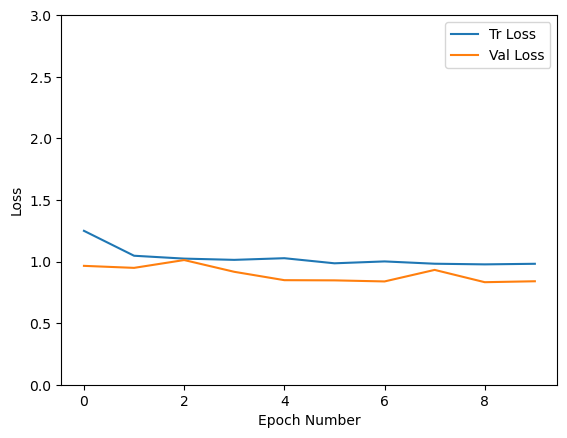

In [118]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.savefig('dataverse_loss_curve.png')
plt.show()

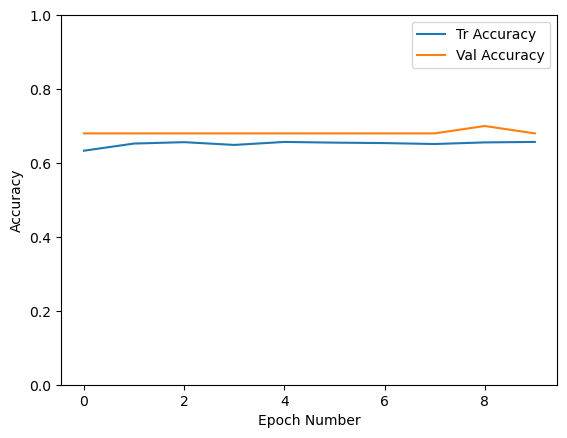

In [119]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('dataverse_accuracy_curve.png')
plt.show()

In [126]:
def computeTestSetAccuracy(model, loss_criterion):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    test_acc = 0.0
    test_loss = 0.0
    
    with torch.no_grad():
        model.eval()
        
        for j, (inputs, labels) in enumerate(test_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            
            loss = loss_criterion(outputs, labels)
            
            test_loss += loss.item() * inputs.size(0)

            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            test_acc += acc.item() * inputs.size(0)

            print("Test Batch number: {:03d}, Test: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

    avg_test_loss = test_loss/test_data_size 
    avg_test_acc = test_acc/test_data_size

    print("Test accuracy : " + str(avg_test_acc))

In [127]:
computeTestSetAccuracy(resnet50, loss_func)

test_acc 12.0
Test Batch number: 000, Test: Loss: 1.1014, Accuracy: 0.7500
test_acc 21.0
Test Batch number: 001, Test: Loss: 1.6363, Accuracy: 0.5625
test_acc 33.0
Test Batch number: 002, Test: Loss: 0.6124, Accuracy: 0.7500
test_acc 42.0
Test Batch number: 003, Test: Loss: 1.0133, Accuracy: 0.5625
test_acc 55.0
Test Batch number: 004, Test: Loss: 0.6523, Accuracy: 0.8125
test_acc 66.0
Test Batch number: 005, Test: Loss: 0.9288, Accuracy: 0.6875
test_acc 74.0
Test Batch number: 006, Test: Loss: 1.2435, Accuracy: 0.5000
test_acc 84.0
Test Batch number: 007, Test: Loss: 1.0905, Accuracy: 0.6250
test_acc 91.0
Test Batch number: 008, Test: Loss: 1.1304, Accuracy: 0.4375
test_acc 100.0
Test Batch number: 009, Test: Loss: 0.9919, Accuracy: 0.5625
test_acc 113.0
Test Batch number: 010, Test: Loss: 0.4433, Accuracy: 0.8125
test_acc 122.0
Test Batch number: 011, Test: Loss: 1.0530, Accuracy: 0.5625
test_acc 129.0
Test Batch number: 012, Test: Loss: 1.1358, Accuracy: 0.4375
test_acc 136.0
Test B

In [128]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)
    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        ls = torch.sum(ps)
        ps = ps/ls
        print(ps)
        topk, topclass = ps.topk(3, dim=1)
        cls = labels[topclass.cpu().numpy()[0][0]]
        score = topk.cpu().numpy()[0][0]

        for i in range(3):
            print("Prediction", i+1, ":", index_to_labels[topclass.cpu().numpy()[0][i]], ", Score: ", topk.cpu().numpy()[0][i])


tensor([[0.0222, 0.0202, 0.0659, 0.0114, 0.0637, 0.7879, 0.0287]],
       device='cuda:0')
Prediction 1 : nv , Score:  0.78789955
Prediction 2 : bkl , Score:  0.065928265
Prediction 3 : mel , Score:  0.06374541


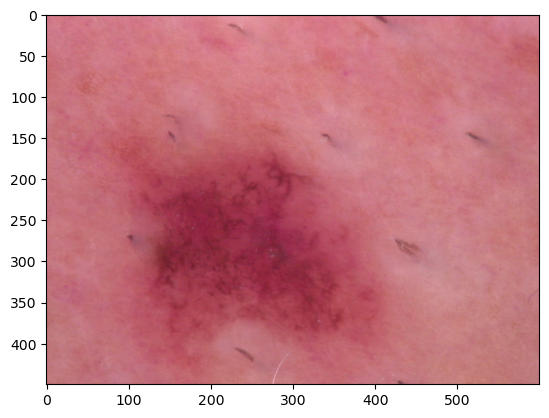

In [129]:
# change the image path to one of the image path in the Image_set folder or any image 
predict(resnet50, "Images_set/nv/ISIC_0024309.jpg")

In [130]:
data_df = pd.read_csv("ISIC2018_Task3_Test_GroundTruth.csv")
print(data_df.to_markdown())

unique_labels = list(set(data_df["dx"]))

|      | lesion_id       | image_id     | dx    | dx_type   |   age | sex     | localization    | dataset       |
|-----:|:----------------|:-------------|:------|:----------|------:|:--------|:----------------|:--------------|
|    0 | HAMTEST_0000000 | ISIC_0034524 | nv    | follow_up |    40 | female  | back            | vidir_molemax |
|    1 | HAMTEST_0000001 | ISIC_0034525 | nv    | histo     |    70 | male    | abdomen         | rosendahl     |
|    2 | HAMTEST_0000002 | ISIC_0034526 | bkl   | histo     |    70 | male    | back            | rosendahl     |
|    3 | HAMTEST_0000003 | ISIC_0034527 | nv    | histo     |    35 | male    | trunk           | vienna_dias   |
|    4 | HAMTEST_0000004 | ISIC_0034528 | nv    | follow_up |    75 | female  | trunk           | vidir_molemax |
|    5 | HAMTEST_0000005 | ISIC_0034529 | mel   | histo     |   nan | unknown | unknown         | external      |
|    6 | HAMTEST_0000006 | ISIC_0034530 | nv    | follow_up |    45 | male    | lower ex

In [131]:
def encode_label(idx, num_classes):
    target_vec = [0 for _ in range(num_classes)]
    target_vec[idx] = 1
    return target_vec

def augment_image(image, crop_size_w=256, crop_size_h=256):
    transform = transforms.Compose([
        transforms.RandomCrop((crop_size_w, crop_size_h)),
        transforms.RandomRotation(degrees=(-11, 11)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    if isinstance(image, torch.Tensor):
        image = transforms.ToPILImage()(image)
    
    augmented_image = transform(image)
    return augmented_image.to(device)

def sharpen(x, T):
    temp = x**(1/T)
    mean_temp = temp.sum(axis=1, keepdims=True)
    normalised_temp = temp/mean_temp
    return normalised_temp


def mixup(x1, x2, y1, y2, alpha):
    beta = np.random.beta(alpha, alpha)
    beta = max(beta, 1-beta)
    x = beta*x1.to(device) + (1-beta)*x2.to(device)
    y = beta*y1.to(device) + (1-beta)*y2.to(device)
    return x, y

### Implementation of MixMatch

In [137]:
def mixmatch(x, y, u, model, batch_size=8, T=0.5, K=2, alpha=0.9):
    # print("Mixmatch called")
    y_vec = []
    for idx in y:
        y_vec.append(encode_label(idx, NUM_CLASSES))
    y_vec = torch.tensor(y_vec)

    x_aug=[]
    u_aug=[]
    q=[]
    for b in range(batch_size):
        x_aug.append(augment_image(x[b]))
        plt.imshow(transforms.ToPILImage()(x[b]))
        u_k=[]
        for k in range(K):
            u_k.append(augment_image(u[k]))
        u_aug.append(u_k)
        # print(type(model(u_k[0].unsqueeze(0))))
        u_k_predictions = torch.stack([model(image.unsqueeze(0)) for image in u_k])
        u_k_sharp = sharpen(u_k_predictions.sum(dim=0) / K, T)
        q.append(u_k_sharp[0])
    
    X_cap = []
    p_cap = []
    U_cap = []
    q_cap = []
    for theta in range(len(x)):
        X_cap.append(x_aug[theta])
        p_cap.append(y_vec[theta])
        for delta in range(len(u_aug[theta])):
            U_cap.append(u_aug[theta][delta])
            q_cap.append(q[theta])
    
    indices = np.arange(len(X_cap)+len(U_cap))
    np.random.shuffle(indices)

    W_cap = []
    W_label_cap = []
    for index in indices:
        if index < len(X_cap):
            W_cap.append(X_cap[index])
            W_label_cap.append(p_cap[index])
        else:
            W_cap.append(U_cap[index-len(X_cap)])
            W_label_cap.append(q_cap[index-len(X_cap)])
        
    X_dash=[]
    p_dash=[]
    for phi in range(len(X_cap)):
        cur_x_dash, cur_p_dash = mixup(X_cap[phi], W_cap[phi], y_vec[phi],
            W_label_cap[phi], alpha)
        X_dash.append(cur_x_dash)
        p_dash.append(cur_p_dash)
    
    U_dash=[]
    q_dash=[]
    for omega in range(len(U_cap)):
        cur_u_dash, cur_q_dash = mixup(U_cap[omega], W_cap[len(X_cap)+omega],
            q_cap[omega], W_label_cap[len(X_cap)+omega], alpha)
        U_dash.append(cur_u_dash)
        q_dash.append(cur_q_dash)

    return X_dash, U_dash, p_dash, q_dash


class MixMatchWrapper:
    def __init__(self, x_labeled, y_labeled, x_unlabeled, model, batch_size=8, T=0.5, K=2, alpha=0.7):
        self.x_labeled = x_labeled
        self.y_labeled = y_labeled
        self.x_unlabeled = x_unlabeled
        self.model = model
        self.batch_size = batch_size
        self.T = T
        self.K = K
        self.alpha = alpha

    def __iter__(self):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        for i in range(0, len(self.x_labeled), self.batch_size):
            x_batch = self.x_labeled[i:i+self.batch_size]
            y_batch = self.y_labeled[i:i+self.batch_size]
            u_batch = self.x_unlabeled[i:i+self.batch_size]

            x_batch_cuda = torch.stack(x_batch).to(device)
            y_batch_cuda = torch.tensor(y_batch).to(device)  # Fix: Convert to tensor
            u_batch_cuda = torch.stack(u_batch).to(device)
            
            X_dash, U_dash, p_dash, q_dash = mixmatch(x_batch_cuda, y_batch_cuda, u_batch_cuda,
                self.model.to(device), len(x_batch), self.T, self.K, self.alpha)

            # Now, X_dash, U_dash, p_dash, and q_dash are lists, convert them to tensors
            X_dash = torch.stack(X_dash).to(device)
            U_dash = torch.stack(U_dash).to(device)
            p_dash = torch.stack(p_dash).to(device)
            q_dash = torch.stack(q_dash).to(device)

            yield X_dash, U_dash, p_dash, q_dash

### Oversampling Attempt (Didnt improve the accuracy)

In [107]:
# l = len(labels)
# for idx in range(l):
#     if labels[idx] != 5:
#         labelled_images.append(labelled_images[idx])
#         labels.append(labels[idx])
        


### Training MixMatch

In [138]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def calculate_accuracy(outputs, targets):
    _, predictions = torch.max(outputs.data, 1)
    target_indices = torch.argmax(targets.data, dim=1)
    correct_counts = predictions.eq(target_indices)
    acc = torch.mean(correct_counts.type(torch.FloatTensor))
    return acc


def train_mixmatch(model, batch_size, epochs):
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None
    best_model = model
    optimizer = optim.Adam(model.parameters(), lr=0.02)
    class_weights = [0]*NUM_CLASSES

    for idx,row in counter_df.iterrows():
        class_weights[idx] = data_len/row["Counter"]

    # class_weights = 1/class_weights
    classification_loss = nn.CrossEntropyLoss(weight = torch.DoubleTensor(class_weights).to(device))
    # classification_loss = nn.CrossEntropyLoss()
    consistency_loss = nn.MSELoss()
        
      
            
    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        model.train()
        # model.to(device)
        
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        len_itr  =  0
        mm = MixMatchWrapper(labelled_images, labels, unlabelled_images, model, batch_size=batch_size)
        
        for i, (X, U, p, q) in enumerate(mm):
            # print(f"Batch number: {i}")

            optimizer.zero_grad()

            logits_x=model(X).to(device)
            logits_u=model(U).to(device)
            
            loss_cls=classification_loss(logits_x, p)
            loss_con=consistency_loss(logits_u, q)

            loss=loss_cls+loss_con
            if loss < best_loss:
                best_loss = loss
                best_model = model
            loss.backward()
            optimizer.step()
            
            lab_acc = calculate_accuracy(logits_x, p)
            unlab_acc = calculate_accuracy(logits_u, q)
            train_acc += (lab_acc + unlab_acc)
            len_itr = i
            # print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), lab_acc+unlab_acc))


        train_acc /= len_itr

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}, Training Accuracy: {train_acc:.4f}")
    
    # torch.save(model.state_dict(), 'mixmatch_resnet50.pth')

    return best_model

c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 1/5
Epoch [1/5], Loss: 57.30911633881434, Training Accuracy: 0.1277
Epoch: 2/5
Epoch [2/5], Loss: 62.86454672107942, Training Accuracy: 0.0942
Epoch: 3/5
Epoch [3/5], Loss: 57.356035224495145, Training Accuracy: 0.1115
Epoch: 4/5
Epoch [4/5], Loss: 51.4500119496267, Training Accuracy: 0.1259
Epoch: 5/5
Epoch [5/5], Loss: 47.67211198238666, Training Accuracy: 0.1073


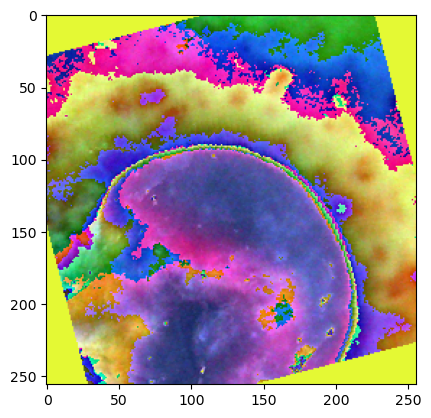

In [139]:
import torch
batch_size = 5
epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet50 = models.resnet50(pretrained=True)
for param in resnet50.parameters():
    param.requires_grad = False

fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, NUM_CLASSES) # , 
    # nn.LogSoftmax(dim=1) # For using NLLLoss()
)

resnet50 = resnet50.to(device)

resnet=train_mixmatch(resnet50, batch_size, epochs)

In [140]:
all_seg_directory = os.path.join(ROOT_DIR, "all_images_segregated")
all_data_set = datasets.ImageFolder(all_seg_directory, transform=image_transforms["train"])

all_data_list = list(all_data_set)
np.random.shuffle(all_data_list)

all_data_loader = DataLoader(all_data_list, batch_size=batch_size, shuffle=True)

### Testing Mixmatch 

In [141]:
def test_model(model, test_loader, device):
    model.eval()

    all_predictions = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for test_images, test_labels in test_loader:
            test_images, test_labels = test_images.to(device), test_labels.to(device)
            
            outputs = model(test_images)

            probabilities = torch.softmax(outputs, dim=1)
            
            # print(test_labels)
            # print(probabilities)
            # print("--------")
            
            _, predicted = torch.max(outputs.data, 1)
            total += test_labels.size(0)
            correct += (predicted == test_labels).sum().item()
            
            batch_predictions = []
            for i in range(test_images.size(0)):
                prediction_info = {
                    "ImageID": i,
                    "PredictedLabel": predicted[i].item(),
                    "ActualLabel": test_labels[i].item()
                }
                
                for class_idx in range(NUM_CLASSES):
                    prediction_info[f"ProbClass{class_idx}"] = probabilities[i][class_idx].item()
                
                batch_predictions.append(prediction_info)
                
            all_predictions.extend(batch_predictions)
    
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

    df = pd.DataFrame(all_predictions)
    df.to_csv("pred.csv", index=False)
    return df

In [142]:
test_model(resnet50, all_data_loader, device)

Test Accuracy: 10.03%


,ImageID,PredictedLabel,ActualLabel,ProbClass0,ProbClass1,ProbClass2,ProbClass3,ProbClass4,ProbClass5,ProbClass6
0,0,4,5,0.155516,0.165141,0.161633,0.148035,0.176479,0.048040,0.145156
1,1,4,5,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
2,2,4,2,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
3,3,4,5,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
4,4,4,5,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
...,...,...,...,...,...,...,...,...,...,...
733,3,4,5,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
734,4,4,6,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
735,0,4,5,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
736,1,4,5,0.155585,0.164973,0.161862,0.147872,0.176319,0.048038,0.145352
